['At iteration '0' the best fitness is '13.69974640358421']
['At iteration '1' the best fitness is '8.781505146935029']
['At iteration '2' the best fitness is '8.419070787960159']
['At iteration '3' the best fitness is '4.138709529575714']
['At iteration '4' the best fitness is '4.039758248691593']
['At iteration '5' the best fitness is '4.039758248691593']
['At iteration '6' the best fitness is '3.9013920842187835']
['At iteration '7' the best fitness is '3.300604510567306']
['At iteration '8' the best fitness is '1.097992584631181']
['At iteration '9' the best fitness is '1.097992584631181']
['At iteration '10' the best fitness is '1.097992584631181']
['At iteration '11' the best fitness is '1.0924437731070076']
['At iteration '12' the best fitness is '1.0924437731070076']
['At iteration '13' the best fitness is '0.9450858953720217']
['At iteration '14' the best fitness is '0.9315627520778702']
['At iteration '15' the best fitness is '0.7499288537463821']
['At iteration '16' the best

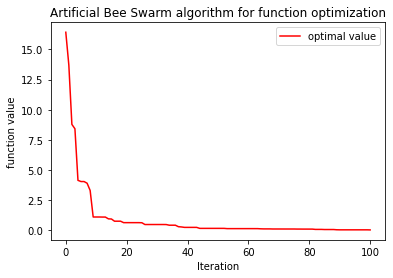

In [3]:
import numpy as np
import random, math, copy
import matplotlib.pyplot as plt

def GrieFunc(data): #Objective function
    s1 = 0.
    s2 = 1.
    for k, x in enumerate(data):
        s1 = s1 + x ** 2
        s2 = s2 * math.cos(x/math.sqrt(k+1))
    y = (1./4000.) * s1-s2 + 1
    return 1./(1. + y)



class ABSIndividual:
    def __init__(self, bound):
        self.score = 0.
        self.invalidCount = 0 #Invalid times (the cumulative number of times the score is not updated)
        self.chrom = [random.uniform(a,b) for a,b in zip(bound[0,:],bound[1,:])] #random initialization

        self.calculateFitness()        

    def calculateFitness(self):
        self.score = GrieFunc(self.chrom) 
        #self.score= fitness(self.chrom)                           
        
class ArtificialBeeSwarm:
    def __init__(self, foodCount, onlookerCount, bound, maxIterCount=1000, maxInvalidCount=200):
        self.foodCount = foodCount                  
        self.onlookerCount = onlookerCount          
        self.bound = bound                          
        self.maxIterCount = maxIterCount            
        self.maxInvalidCount = maxInvalidCount      
        self.foodList = [ABSIndividual(self.bound) for k in range(self.foodCount)]   
        self.foodScore = [d.score for d in self.foodList]                             
        self.bestFood = self.foodList[np.argmax(self.foodScore)]                    

    def updateFood(self, i):                                                  
        k = random.randint(0, self.bound.shape[1] - 1)                        
        j = random.choice([d for d in range(self.bound.shape[1]) if d !=i])   
        vi = copy.deepcopy(self.foodList[i])
        vi.chrom[k] += random.uniform(-1.0, 1.0) * (vi.chrom[k] - self.foodList[j].chrom[k]) 
        vi.chrom[k] = np.clip(vi.chrom[k], self.bound[0, k], self.bound[1, k])               
        vi.calculateFitness()
        if vi.score > self.foodList[i].score:          
            self.foodList[i] = vi
            if vi.score > self.foodScore[i]:           
                self.foodScore[i] = vi.score
                if vi.score > self.bestFood.score:     
                    self.bestFood = vi
            self.foodList[i].invalidCount = 0
        else:
            self.foodList[i].invalidCount += 1
            
    def employedBeePhase(self):
        for i in range(0, self.foodCount):              
            self.updateFood(i)            

    def onlookerBeePhase(self):
        foodScore = [d.score for d in self.foodList]  
        maxScore = np.max(foodScore)        
        accuFitness = [(0.9*d/maxScore+0.1, k) for k,d in enumerate(foodScore)]       
        for k in range(0, self.onlookerCount):
            i = random.choice([d[1] for d in accuFitness if d[0] >= random.random()]) 
            self.updateFood(i)

    def scoutBeePhase(self):
        for i in range(0, self.foodCount):
            if self.foodList[i].invalidCount > self.maxInvalidCount:                  
                self.foodList[i] = ABSIndividual(self.bound)
                self.foodScore[i] = max(self.foodScore[i], self.foodList[i].score)

    def solve(self):
        trace = []
        trace.append((self.bestFood.score, np.mean(self.foodScore)))
        for k in range(self.maxIterCount):
            self.employedBeePhase()
            self.onlookerBeePhase()
            self.scoutBeePhase()
            trace.append((self.bestFood.score, np.mean(self.foodScore)))
            tt=self.bestFood.score
            tt=(1-tt)/tt
            print("['At iteration '"+ str(k)+ "' the best fitness is '"+ str(tt)+"']")
        self.printResult(np.array(trace))

    def printResult(self, trace):
        x = np.arange(0, trace.shape[0])
        plt.plot([(1-d)/d for d in trace[:, 0]], 'r', label='optimal value')
        #plt.plot([(1-d)/d for d in trace[:, 1]],'g', label='average value')
        plt.xlabel("Iteration")
        plt.ylabel("function value")
        plt.title("Artificial Bee Swarm algorithm for function optimization")
        plt.legend()
        plt.show()

if __name__ == "__main__":
    random.seed()
    vardim = 5
    bound = np.tile([[-600], [600]], vardim)
    abs = ArtificialBeeSwarm(30, 30, bound, 100, 200)
    abs.solve()